In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import os
import re
import nltk
import random
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Data visualization
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_rand(string):
    new_string = ''
    string = string.rstrip()
    string_split = string.split(' ')
    num_1 = random.randint(0, len(string_split))
    num_2 = random.randint(0, len(string_split))
    
    if num_1 > num_2 and num_1 - num_2 > 5:
        num_3 = random.randint(0, 5)
        for x in range(num_2, num_2 + num_3):
            new_string += string_split[x] + ' '
    
    elif num_2 > num_1 and num_2 - num_1 > 5:
        num_3 = random.randint(0, 5)
        for x in range(num_1, num_1 + num_3):
            new_string += string_split[x] + ' '
            
    elif num_1 > num_2:
        for x in range(num_2, num_1):
            new_string += string_split[x] + ' '
    elif num_1 > num_2:
        for x in range(num_1, num_2):
            new_string += string_split[x] + ' '
    
    new_string = new_string.rstrip()
    
    if new_string == '':
        new_string += string_split[random.randint(0, len(string_split)-1)]
    

    return new_string

In [4]:
def get_csv(file_in, file_out):
    xml_data = open(file_in, 'r', encoding="utf8").read()  # Read file
    splits = xml_data.split("<definition>")[1]

    defs = splits.split("</definition>")[0]
    
    true_splits = defs.split("\n")
    
    true_defs = []
    for x in true_splits:
        if '&lt;ex&gt' in x:
            true_defs.append(x) 
    
    for test in true_defs:     
        c_test = []

        test_s = test.split(";")
        for x in test_s:
            if (x.strip() == "&lt" or x.strip() == "ex&gt" or x.strip() == "/fex&gt" or x.strip() == "/fex&gt" or x.strip() == "&lt" 
                or x.strip() == "ex&gt" or x.strip() == "/fex&gt" or x.strip() == "&lt" or x.strip() == "/ex&gt" or x.strip() == '/t&gt'
               or x.strip() == '' or x.strip() == '/def-root&gt'):
                pass
            elif x.strip() == 't&gt':
                c_test.append('lu = "Frame"')
            else:
                c_test.append(x.replace('fex name=', 'lu = '))
        final = []
        for x in c_test:
            x = x.replace('/m&gt', ' ')
            x = x.replace('m&gt', ' ')
            x = x.replace('&gt', '')
            x = x.replace('&lt', '')
            final.append(x)
        
        filetxt = str(file_in).replace("<DirEntry '", '')
        filetxt = filetxt.replace(".xml'>", ',')
        
        file_out.write(filetxt)
        file_out.write(create_csv_line(final))
        file_out.write("\n")

In [5]:
def create_csv_line(final):
    frame = ''
    agent = ''
    activity = ''
    string = ''
    other = ''
    for x in final:
        if 'lu = ' in x:
            string += ' '
        else:
            string += x
    string = string.strip()
    count = 0
    for x in final:
        if 'lu = ' in x:
            x = x.replace('lu = ', '')
            if x == '"Frame"':
                frame = final[count+1]
            elif x == '"Agent"':
                agent = final[count+1]
            elif x == '"Activity"':
                activity = final[count+1]
        count += 1
    string  = re.sub(r'[^\w\s]', ' ', string)
    frame  = re.sub(r'[^\w\s]', ' ', frame)
    agent  = re.sub(r'[^\w\s]', ' ', agent)
    activity  = re.sub(r'[^\w\s]', ' ', activity)
    
    
    
    stringt = word_tokenize(string.lower())
    string = ''
    for word in stringt:
        string += word_lemmatizer.lemmatize(word, "v") + ' '
        
    framet = word_tokenize(frame.lower())
    frame = ''
    for word in framet:
        frame += word_lemmatizer.lemmatize(word, "v") + ' '
        
    agentt = word_tokenize(agent.lower())
    agent = ''
    for word in agentt:
        agent += word_lemmatizer.lemmatize(word, "v") + ' '
        
    activityt = word_tokenize(activity.lower())
    activity = ''
    for word in activityt:
        activity += word_lemmatizer.lemmatize(word, "v") + ' '
         
    
    return string 

In [30]:
directory = 'frame'
word_lemmatizer = WordNetLemmatizer()

 
with open("frames.txt", mode = "w") as f:
    f.write('fName, Text\n')
    for filename in os.scandir(directory):
        if filename.is_file():
            get_csv(filename, f)

In [123]:
df = pd.read_csv('frames.txt', encoding="unicode_escape")

In [124]:
df.shape

(2884, 2)

In [125]:
df = df.dropna()

In [126]:
df.head()

,fName,Text
1,Body_parts,he have to brace his right arm against his leg...
2,Body_parts,the dog measure its blond belly in the mud
5,Judgment,judgment she admire einstein for his character
6,Judgment,judgment_communication she accuse einstein of ...
8,Citing,the police have summons the wrong man dni


In [127]:
df.iloc[4][1]

'the police have summons the wrong man dni '

In [128]:
df_data_v = pd.DataFrame(columns = ['A', 'B'])

In [129]:
df_data_iv = pd.DataFrame(columns = ['C', 'D'])

In [130]:
df.head()

,fName,Text
1,Body_parts,he have to brace his right arm against his leg...
2,Body_parts,the dog measure its blond belly in the mud
5,Judgment,judgment she admire einstein for his character
6,Judgment,judgment_communication she accuse einstein of ...
8,Citing,the police have summons the wrong man dni


In [131]:
%%time

for index, row in df.iterrows():
    for index1, row1 in df.iterrows():
        if row[0] == row1[0]:
            df_data_v = df_data_v.append({'A':row[1], 'B':row1[1]}, ignore_index = True)

CPU times: user 3min 51s, sys: 72.6 ms, total: 3min 51s
Wall time: 3min 51s


In [132]:
df_data_v.shape

(11163, 2)

In [133]:
%%time

count = 0
for index, row in df.iterrows():
    for index1, row1 in df.iterrows():
        if count >= 670:
            if row[0] != row1[0]:
                df_data_iv = df_data_iv.append({'C':row[1], 'D':row1[1]}, ignore_index = True)
                count=0
            else:
                count += 1
        else:
            count+=1

CPU times: user 3min 16s, sys: 75.8 ms, total: 3min 16s
Wall time: 3min 16s


In [134]:
df_data_iv.shape

(10410, 2)

In [135]:
print(len(pd.unique(df_data_v['B'])))
print(len(pd.unique(df_data_iv['D'])))

2583
2583


In [136]:
df_data_v.head()

,A,B
0,he have to brace his right arm against his leg...,he have to brace his right arm against his leg...
1,he have to brace his right arm against his leg...,the dog measure its blond belly in the mud
2,the dog measure its blond belly in the mud,he have to brace his right arm against his leg...
3,the dog measure its blond belly in the mud,the dog measure its blond belly in the mud
4,judgment she admire einstein for his character,judgment she admire einstein for his character


In [137]:
df_data_iv.head()

,C,D
0,he have to brace his right arm against his leg...,the banner be estimate in value at 500 cni
1,he have to brace his right arm against his leg...,diotrephes withstand john s word and would not...
2,he have to brace his right arm against his leg...,the part i vividly remember be about a south s...
3,the dog measure its blond belly in the mud,this be a cumulative figure obtain by add up t...
4,the dog measure its blond belly in the mud,if it rain the ceremony will be under the tent


In [138]:
df_sample_v = df_data_v.sample(frac=0.05)
df_sample_iv = df_data_iv.sample(frac=0.05)

In [139]:
print(len(pd.unique(df_sample_v['B'])))
print(len(pd.unique(df_sample_iv['D'])))

476
475


In [140]:
df_data = pd.DataFrame(columns = ['A', 'B', 'C', 'D', 'value'])

In [141]:
%%time

for index, row in df_sample_v.iterrows():
    for index1, row1 in df_sample_v.iterrows():
            df_data = df_data.append({'A':row[0], 'B':row[1], 'C':row1[0], 'D':row1[1], 'value':1}, ignore_index = True)

CPU times: user 21min 4s, sys: 352 ms, total: 21min 4s
Wall time: 21min 4s


In [142]:
print('Rows of data:',df_data.shape[0])
print('columns of data:',df_data.shape[1])

(311364, 5)

In [143]:
%%time

for index, row in df_sample_v.iterrows():
    for index1, row1 in df_sample_iv.iterrows():
            df_data = df_data.append({'A':row[0], 'B':row[1], 'C':row1[0], 'D':row1[1], 'value':0}, ignore_index = True)

CPU times: user 46min 45s, sys: 11.2 s, total: 46min 57s
Wall time: 46min 56s


In [144]:
df_data.to_csv('df_data.csv')

In [6]:
df_data = pd.read_csv('df_data.csv')
df_data.drop(['Unnamed: 0'], axis = 1,inplace = True)
df_data.head()

,A,B,C,D,value
0,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,1
1,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,ellen journey to europe with five suitcases,ellen journey to europe with five suitcases,1
2,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,there be so many children in the family,i felt an unease inside me,1
3,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,almost immediately the police discover the wor...,later that night they find the barely alive vi...,1
4,i would consider strike distance to mentbe men...,i would consider strike distance to mentbe men...,6b second fe layer the population of smallvill...,6b second fe layer the population of smallvill...,1


# Data visualization

Text(0.5, 0.98, 'Binary Classification')

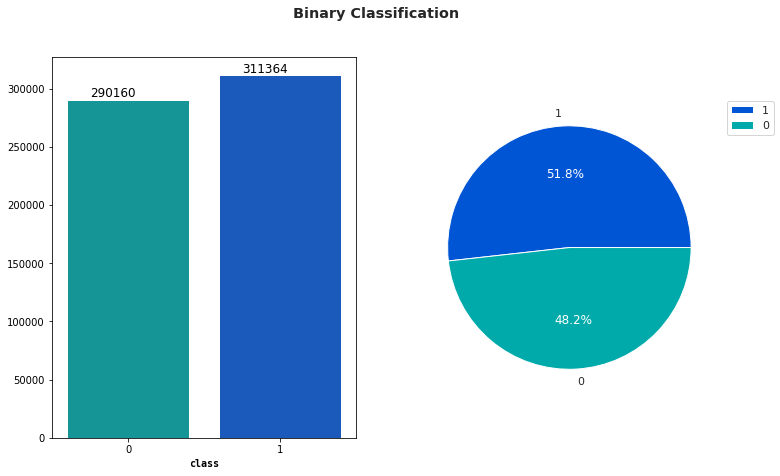

In [7]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12,7))
x=df_data['value'].value_counts().index
y=df_data['value'].value_counts().values.tolist()
data = df_data.groupby("value").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("winter", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('class', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_data['value'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Binary Classification',weight = 'bold')

In [8]:
print('Valid samples :', df_data['value'].value_counts()[0])
print('Invalid samples :', df_data['value'].value_counts()[1])

Valid samples : 290160
Invalid samples : 311364


In [9]:
print('Samples:', df_data.shape[0])
print('Features:', df_data.shape[1])

Samples: 601524
Features: 5


In [10]:
df_d1 = df_data.sample(frac=0.05)
df_d2 = df_data.sample(frac=0.05)
print('Shape of df_d1:', df_d1.shape)
print('Sahpe of df_d2:', df_d2.shape)

Shape of df_d1: (30076, 5)
Sahpe of df_d2: (30076, 5)


In [11]:
print('Counts of each class in df_d1:')
print(df_d1['value'].value_counts())
print('\nCounts of each class df_d2:')
print(df_d2['value'].value_counts())

Counts of each class in df_d1:
1    15650
0    14426
Name: value, dtype: int64

Counts of each class df_d2:
1    15599
0    14477
Name: value, dtype: int64


# SBERT

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sentence_transformers import SentenceTransformer

df = df_d1

# Load Pretrained SBERT Model
model_name = 'distilbert-base-nli-stsb-mean-tokens'
tokenizer = SentenceTransformer(model_name)

sentences = []
temp = []
# Extract sentence embeddings
for index, row in df.iterrows():
    temp.append(row['A'])
    temp.append(row['B'])
    temp.append(row['C'])
    temp.append(row['D'])
    sentences.append(temp)
    temp = []
    
embeddings = np.array(tokenizer.encode(sentences, show_progress_bar=True)).astype(np.float32)

# Formulate input-output Dataset
labels = df['value'].values.astype(np.int64)
input_dataset = TensorDataset(torch.tensor(embeddings), torch.tensor(labels))

# DataLoader
dataloader = DataLoader(input_dataset, batch_size=32, shuffle=True)

# Define Binary Classification Model
class BinaryClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, 384)
        self.fc2 = torch.nn.Linear(384, 192)
        self.fc3 = torch.nn.Linear(192, 96)
        self.fc4 = torch.nn.Linear(96, 48)
        self.fc5 = torch.nn.Linear(48, 24)
        self.fc6 = torch.nn.Linear(24, 2)
        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc6(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        return x

# instantiate the Binary Classifier Model
model = BinaryClassifier(embeddings.shape[1])

# Define Loss and Optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

n_epochs = 10

train_acc_bert = []
train_loss_bert = []
val_acc_bert = []
val_loss_bert = []

# Train the Model
for i in range(n_epochs):
    train_loss = 0.
    correct_train = 0.

    model.train()
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        # Keep Track of Accuracy and Loss
        train_loss += loss.item() * inputs.shape[0]
        predicted = torch.argmax(outputs, dim=1)
        correct_train += (predicted == labels).sum().item()
        
        training_loss = train_loss/len(input_dataset)
        training_accuracy = correct_train/len(input_dataset)
        
        

    # Evaluate on Validation Set after first epoch
    
    val_loss = 0.
    correct_val = 0.

    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)

            val_loss += loss.item() * inputs.shape[0]
            predicted = torch.argmax(outputs, dim=1)
            correct_val += (predicted == labels).sum().item()
            
            validation_loss = val_loss/len(input_dataset)
            validation_accuracy = correct_val/len(input_dataset)
            
        print(f"Epoch: {i+1}. Train Loss: {(training_loss):.5f} Train Accuracy: {(100*training_accuracy):.3f}%. Validation Loss: {(validation_loss):.5f}. Validation Accuracy: {(100*validation_accuracy):.3f}%.") 
        train_acc_bert.append(training_accuracy)
        train_loss_bert.append(training_loss)
        val_acc_bert.append(validation_accuracy)
        val_loss_bert.append(validation_loss)

Batches:   0%|          | 0/940 [00:00<?, ?it/s]

Epoch: 1. Train Loss: 0.69377 Train Accuracy: 50.934%. Validation Loss: 0.69158. Validation Accuracy: 52.111%.
Epoch: 2. Train Loss: 0.69230 Train Accuracy: 51.696%. Validation Loss: 0.69112. Validation Accuracy: 53.584%.
Epoch: 3. Train Loss: 0.69159 Train Accuracy: 51.948%. Validation Loss: 0.69002. Validation Accuracy: 53.721%.
Epoch: 4. Train Loss: 0.69100 Train Accuracy: 52.500%. Validation Loss: 0.68892. Validation Accuracy: 54.356%.
Epoch: 5. Train Loss: 0.69069 Train Accuracy: 52.746%. Validation Loss: 0.68836. Validation Accuracy: 54.632%.
Epoch: 6. Train Loss: 0.68942 Train Accuracy: 53.704%. Validation Loss: 0.68791. Validation Accuracy: 54.675%.
Epoch: 7. Train Loss: 0.68980 Train Accuracy: 52.713%. Validation Loss: 0.68714. Validation Accuracy: 54.711%.
Epoch: 8. Train Loss: 0.68901 Train Accuracy: 53.574%. Validation Loss: 0.68673. Validation Accuracy: 55.004%.
Epoch: 9. Train Loss: 0.68927 Train Accuracy: 53.209%. Validation Loss: 0.68720. Validation Accuracy: 55.041%.
E

### Graphs

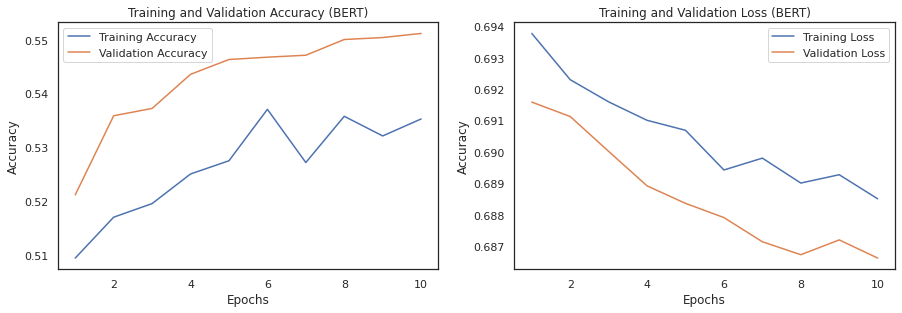

In [13]:
epochs = range(1, len(train_acc_bert) + 1)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(epochs, train_acc_bert, label='Training Accuracy')
plt.plot(epochs, val_acc_bert, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (BERT)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(epochs, train_loss_bert, label='Training Loss')
plt.plot(epochs, val_loss_bert, label='Validation Loss')
plt.title('Training and Validation Loss (BERT)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 


# Fine tuning of SBERT

In [14]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sentence_transformers import SentenceTransformer

# Your existing code ...

# Define a dictionary to store the best parameters
best_params = {
    'learning_rate': None,
    'batch_size': None,
    'optimizer': None,
    'loss_fn': None,
    'validation_accuracy': 0.0
}

# Define a list to store validation accuracies for different parameter combinations
val_acc_list = []

# Define the parameter search space
learning_rates = [1e-4, 1e-3, 1e-2]
batch_sizes = [16, 32, 64]
optimizers = ['adam', 'sgd']
loss_fns = ['CrossEntropyLoss', 'NLLLoss']

# Perform parameter search
for lr in learning_rates:
    for batch_size in batch_sizes:
        for optimizer_name in optimizers:
            for loss_fn_name in loss_fns:
                # Create a new instance of the Binary Classifier Model
                model = BinaryClassifier(embeddings.shape[1])
                model.to(device)

                # Define Loss and Optimizer based on the current parameter combination
                if loss_fn_name == 'CrossEntropyLoss':
                    loss_fn = torch.nn.CrossEntropyLoss()
                else:
                    loss_fn = torch.nn.NLLLoss()

                if optimizer_name == 'adam':
                    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                else:
                    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

                # DataLoader
                dataloader = DataLoader(input_dataset, batch_size=batch_size, shuffle=True)

                # Train the model
                for epoch in range(n_epochs):
                    # Training loop

                    # Validation loop
                    model.eval()
                    val_loss = 0.0
                    correct_val = 0

                    with torch.no_grad():
                        for inputs, labels in dataloader:
                            inputs, labels = inputs.to(device), labels.to(device)

                            outputs = model(inputs)
                            loss = loss_fn(outputs.squeeze(), labels)

                            val_loss += loss.item() * inputs.shape[0]
                            predicted = torch.argmax(outputs, dim=1)
                            correct_val += (predicted == labels).sum().item()

                        validation_loss = val_loss / len(input_dataset)
                        validation_accuracy = correct_val / len(input_dataset)

                        # Store the best parameters based on validation accuracy
                        if validation_accuracy > best_params['validation_accuracy']:
                            best_params['learning_rate'] = lr
                            best_params['batch_size'] = batch_size
                            best_params['optimizer'] = optimizer_name
                            best_params['loss_fn'] = loss_fn_name
                            best_params['validation_accuracy'] = validation_accuracy

                        val_acc_list.append(validation_accuracy)



In [15]:
print('Best Parameters:')
print('Learning Rate:', best_params['learning_rate'])
print('Batch size:', best_params['batch_size'])
print('Optimizer:', best_params['optimizer'])
print('Loss function:', best_params['loss_fn'])

Best Parameters:
Learning Rate: 0.0001
Batch size: 16
Optimizer: sgd
Loss function: CrossEntropyLoss


# SBERT with Best Parameters

In [16]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sentence_transformers import SentenceTransformer

df = df_d1

# Load Pretrained SBERT Model
model_name = 'distilbert-base-nli-stsb-mean-tokens'
tokenizer = SentenceTransformer(model_name)

sentences = []
temp = []
# Extract sentence embeddings
for index, row in df.iterrows():
    temp.append(row['A'])
    temp.append(row['B'])
    temp.append(row['C'])
    temp.append(row['D'])
    sentences.append(temp)
    temp = []
embeddings = np.array(tokenizer.encode(sentences, show_progress_bar=True)).astype(np.float32)

# Formulate input-output Dataset
labels = df['value'].values.astype(np.int64)
input_dataset = TensorDataset(torch.tensor(embeddings), torch.tensor(labels))

# DataLoader
dataloader = DataLoader(input_dataset, batch_size=64, shuffle=True)

# Define Binary Classification Model
class BinaryClassifier(torch.nn.Module):
  def __init__(self, input_dim):
    super(BinaryClassifier, self).__init__()
    self.fc1 = torch.nn.Linear(input_dim, 32)
    self.fc2 = torch.nn.Linear(32, 16)
    self.fc3 = torch.nn.Linear(16, 2)
    self.dropout = torch.nn.Dropout(0.1)

  def forward(self, x):
      x = self.fc1(x)
      x = torch.nn.functional.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      x = torch.nn.functional.relu(x)
      x = self.dropout(x)
      x = self.fc3(x)
      return x

# instantiate the Binary Classifier Model
model = BinaryClassifier(embeddings.shape[1])

# Define Loss and Optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

n_epochs = 20

train_acc_bbert = []
train_loss_bbert = []
val_acc_bbert = []
val_loss_bbert = []

# Train the Model
for i in range(n_epochs):
    train_loss = 0.
    correct_train = 0.

    model.train()
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        # Keep Track of Accuracy and Loss
        train_loss += loss.item() * inputs.shape[0]
        predicted = torch.argmax(outputs, dim=1)
        correct_train += (predicted == labels).sum().item()
        
        training_loss = train_loss/len(input_dataset)
        training_accuracy = correct_train/len(input_dataset)

    # Evaluate on Validation Set after first epoch
    
    val_loss = 0.
    correct_val = 0.

    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)

            val_loss += loss.item() * inputs.shape[0]
            predicted = torch.argmax(outputs, dim=1)
            correct_val += (predicted == labels).sum().item()
            
            validation_loss = val_loss/len(input_dataset)
            validation_accuracy = correct_val/len(input_dataset)
            
            
    print(f"Epoch: {i+1}. Train Loss: {(training_loss):.5f} Train Accuracy: {(100*training_accuracy):.3f}%. Validation Loss: {(validation_loss):.5f}. Validation Accuracy: {(100*validation_accuracy):.3f}%.")
    train_acc_bbert.append(training_accuracy)
    train_loss_bbert.append(training_loss)
    val_acc_bbert.append(validation_accuracy)
    val_loss_bbert.append(validation_loss)

Batches:   0%|          | 0/940 [00:00<?, ?it/s]

Epoch: 1. Train Loss: 0.69434 Train Accuracy: 49.781%. Validation Loss: 0.69196. Validation Accuracy: 52.221%.
Epoch: 2. Train Loss: 0.69219 Train Accuracy: 51.945%. Validation Loss: 0.69114. Validation Accuracy: 52.613%.
Epoch: 3. Train Loss: 0.69184 Train Accuracy: 52.337%. Validation Loss: 0.69047. Validation Accuracy: 53.571%.
Epoch: 4. Train Loss: 0.69116 Train Accuracy: 52.613%. Validation Loss: 0.68977. Validation Accuracy: 53.425%.
Epoch: 5. Train Loss: 0.69071 Train Accuracy: 52.873%. Validation Loss: 0.68920. Validation Accuracy: 54.023%.
Epoch: 6. Train Loss: 0.69041 Train Accuracy: 53.009%. Validation Loss: 0.68879. Validation Accuracy: 53.983%.
Epoch: 7. Train Loss: 0.68989 Train Accuracy: 53.391%. Validation Loss: 0.68830. Validation Accuracy: 54.452%.
Epoch: 8. Train Loss: 0.68939 Train Accuracy: 53.598%. Validation Loss: 0.68786. Validation Accuracy: 54.459%.
Epoch: 9. Train Loss: 0.68927 Train Accuracy: 53.770%. Validation Loss: 0.68764. Validation Accuracy: 54.412%.
E

### Graphs

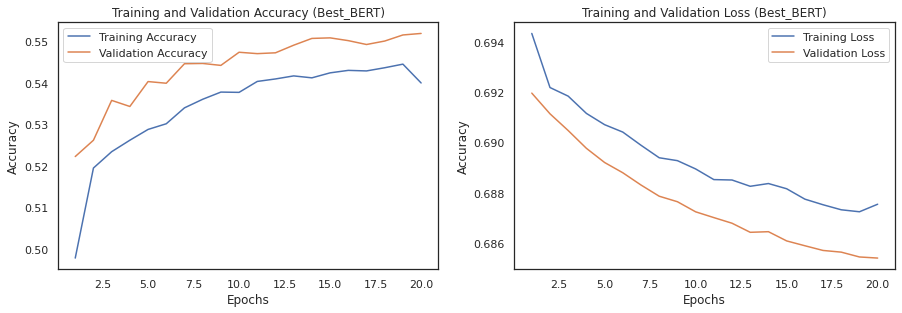

In [17]:
epochs = range(1, len(train_acc_bbert) + 1)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(epochs, train_acc_bbert, label='Training Accuracy')
plt.plot(epochs, val_acc_bbert, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Best_BERT)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(epochs, train_loss_bbert, label='Training Loss')
plt.plot(epochs, val_loss_bbert, label='Validation Loss')
plt.title('Training and Validation Loss (Best_BERT)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 


# MiniLM

In [33]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers.utils import check_min_version

# Ensure transformers version 4.6.0 or higher
check_min_version("4.6.0")

# Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, tokenizer, sentences, labels):
        self.encodings = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load Dataframe
df = df_d2.sample(frac=0.05)

# Load Pretrained MiniLM Model
model_name = 'microsoft/MiniLM-L12-H384-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Convert Labels to Long Type
labels = df['value'].astype(int).values.astype(np.int64)

# Tokenize Sentences and Form Dataset
sentences = [f"{row.A} {row.B} {row.C} {row.D}" for _, row in df.iterrows()]
dataset = CustomDataset(tokenizer, sentences, labels)

# DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Define Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=1e-6)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

n_epochs = 10

# Training Loop
# Training Loop
train_acc_lm = []
val_acc_lm = []
train_loss_lm = []
val_loss_lm = []
for epoch in range(n_epochs):
    print(f"Epoch: {epoch+1}")
    model.train()
    total_correct = 0
    total_samples = 0

    for batch in dataloader:
        # Fetch Input-Output Batch and Move to GPU
        inputs = {'input_ids': batch['input_ids'].to(device),
                  'attention_mask': batch['attention_mask'].to(device)}
        labels = batch['labels'].to(device)

        # Clear Gradients and Compute Output
        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)

        # Compute Loss and Backpropagate
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        predictions = torch.argmax(outputs.logits, dim=1)
        total_correct += (predictions == labels).sum().item()
        total_samples += len(labels)

    training_accuracy = total_correct / total_samples
    train_acc_lm.append(training_accuracy)
    training_loss= 1 - training_accuracy
    train_loss_lm.append(training_loss)

    # Evaluate Model at end of Epoch
    model.eval()
    with torch.no_grad():
        val_loss = 0
        val_correct = 0
        val_total = 0

        for batch in dataloader:
            inputs = {'input_ids': batch['input_ids'].to(device),
                      'attention_mask': batch['attention_mask'].to(device)}
            labels = batch['labels'].to(device)

            outputs = model(**inputs, labels=labels)
            val_loss += outputs.loss.item() * len(labels)
            val_correct += (torch.argmax(outputs.logits, dim=1) == labels).sum().item()
            val_total += len(labels)

            validation_accuracy = val_correct / val_total
            validation_loss = 1 - validation_accuracy
            
        print(f"Training Accuracy: {training_accuracy:.3f}, Validation Accuracy: {validation_accuracy:.3f}, Traning Loss: {training_loss:.3f}, Validation loss: {(validation_loss):.3f} ")
        val_loss_lm.append(validation_loss)
        val_acc_lm.append(validation_accuracy)
    scheduler.step()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Epoch: 1
Training Accuracy: 0.492, Validation Accuracy: 0.590, Traning Loss: 0.508, Validation loss: 0.410 
Epoch: 2
Training Accuracy: 0.499, Validation Accuracy: 0.581, Traning Loss: 0.501, Validation loss: 0.419 
Epoch: 3
Training Accuracy: 0.508, Validation Accuracy: 0.578, Traning Loss: 0.492, Validation loss: 0.422 
Epoch: 4
Training Accuracy: 0.516, Validation Accuracy: 0.578, Traning Loss: 0.484, Validation loss: 0.422 
Epoch: 5
Training Accuracy: 0.501, Validation Accuracy: 0.578, Traning Loss: 0.499, Validation loss: 0.422 
Epoch: 6
Training Accuracy: 0.520, Validation Accuracy: 0.578, Traning Loss: 0.480, Validation loss: 0.422 
Epoch: 7
Training Accuracy: 0.526, Validation Accuracy: 0.578, Traning Loss: 0.474, Validation loss: 0.422 
Epoch: 8
Training Accuracy: 0.511, Validation Accuracy: 0.578, Traning Loss: 0.489, Validation loss: 0.422 
Epoch: 9
Training Accuracy: 0.527, Validation Accuracy: 0.578, Traning Loss: 0.473, Validation loss: 0.422 
Epoch: 10
Training Accuracy:

### Graph of Training and losses

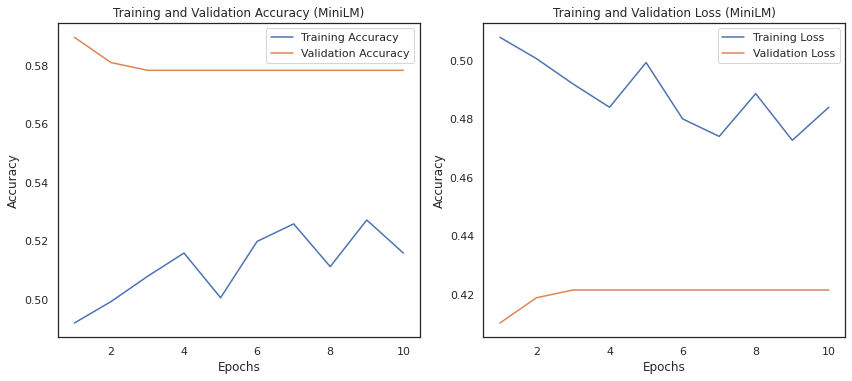

In [34]:
epochs = range(1, len(train_acc_lm) + 1)
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.plot(epochs, train_acc_lm, label='Training Accuracy')
plt.plot(epochs, val_acc_lm, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (MiniLM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(epochs, train_loss_lm, label='Training Loss')
plt.plot(epochs, val_loss_lm, label='Validation Loss')
plt.title('Training and Validation Loss (MiniLM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.tight_layout()

## Fine Tuning of MiniLM

In [22]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers.utils import check_min_version

# Ensure transformers version 4.6.0 or higher
check_min_version("4.6.0")

# Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, tokenizer, sentences, labels):
        self.encodings = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load Dataframe
df = df_d2.sample(frac=0.05)

# Load Pretrained MiniLM Model
model_name = 'microsoft/MiniLM-L12-H384-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Convert Labels to Long Type
labels = df['value'].astype(int).values.astype(np.int64)

# Tokenize Sentences and Form Dataset
sentences = [f"{row.A} {row.B} {row.C} {row.D}" for _, row in df.iterrows()]
dataset = CustomDataset(tokenizer, sentences, labels)

# DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Define a dictionary to store the best parameters
best_params_lm = {
    'learning_rate': None,
    'batch_size': None,
    'optimizer': None,
    'validation_accuracy': 0.0
}

# Define a list to store validation accuracies for different parameter combinations
val_acc_list = []

# Define the parameter search space
learning_rates = [ 1e-5, 1e-4]
batch_sizes = [16, 32]
optimizers = ['Adam', 'SGD']

# Perform parameter search
for lr in learning_rates:
    for batch_size in batch_sizes:
        for optimizer_name in optimizers:
            # Create a new instance of the MiniLM Model
            model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            model.to(device)

            # Define Optimizer based on the current parameter combination
            if optimizer_name == 'AdamW':
                optimizer = AdamW(model.parameters(), lr=lr)
            elif optimizer_name == 'Adam':
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            elif optimizer_name == 'SGD':
                optimizer = torch.optim.SGD(model.parameters(), lr=lr)

            # DataLoader
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

            # Training Loop
            train_acc_lm = []
            val_acc_lm = []
            train_loss_lm = []
            val_loss_lm = []

            for epoch in range(n_epochs):
                print(f"Epoch: {epoch+1}")
                model.train()
                total_correct = 0
                total_samples = 0

                for batch in dataloader:
                    # Fetch Input-Output Batch and Move to GPU
                    inputs = {'input_ids': batch['input_ids'].to(device),
                              'attention_mask': batch['attention_mask'].to(device)}
                    labels = batch['labels'].to(device)

                    # Clear Gradients and Compute Output
                    optimizer.zero_grad()
                    outputs = model(**inputs, labels=labels)

                    # Compute Loss and Backpropagate
                    loss = outputs.loss
                    loss.backward()
                    optimizer.step()

                    # Calculate training accuracy
                    predictions = torch.argmax(outputs.logits, dim=1)
                    total_correct += (predictions == labels).sum().item()
                    total_samples += len(labels)

                training_accuracy = total_correct / total_samples

                training_loss = 1 - training_accuracy

                # Evaluate Model at end of Epoch
                model.eval()
                with torch.no_grad():
                    val_loss = 0
                    val_correct = 0
                    val_total = 0

                    for batch in dataloader:
                        inputs = {'input_ids': batch['input_ids'].to(device),
                                  'attention_mask': batch['attention_mask'].to(device)}
                        labels = batch['labels'].to(device)

                        outputs = model(**inputs, labels=labels)
                        val_loss += outputs.loss.item() * len(labels)
                        val_correct += (torch.argmax(outputs.logits, dim=1) == labels).sum().item()
                        val_total += len(labels)

                    validation_accuracy = val_correct / val_total
                    validation_loss = val_loss / val_total

                    # Store the best parameters based on validation accuracy
                    if validation_accuracy > best_params['validation_accuracy']:
                        best_params['learning_rate'] = lr
                        best_params['batch_size'] = batch_size
                        best_params['optimizer'] = optimizer_name
                        best_params['validation_accuracy'] = validation_accuracy


            print(f"Training Accuracy: {training_accuracy:.3f}, Validation Accuracy: {validation_accuracy:.3f}, "
                  f"Training Loss: {training_loss:.3f}, Validation Loss: {(validation_loss):.3f}")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.983, Validation Accuracy: 0.995, Training Loss: 0.017, Validation Loss: 0.025


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.515, Validation Accuracy: 0.515, Training Loss: 0.485, Validation Loss: 0.693


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.977, Validation Accuracy: 0.996, Training Loss: 0.023, Validation Loss: 0.030


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.509, Validation Accuracy: 0.514, Training Loss: 0.491, Validation Loss: 0.693


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.960, Validation Accuracy: 0.951, Training Loss: 0.040, Validation Loss: 0.123


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.517, Validation Accuracy: 0.515, Training Loss: 0.483, Validation Loss: 0.693


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.976, Validation Accuracy: 0.984, Training Loss: 0.024, Validation Loss: 0.050


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Training Accuracy: 0.515, Validation Accuracy: 0.515, Training Loss: 0.485, Validation Loss: 0.692


In [25]:
# Print the best parameters
print('Best Parameters of MiniLM:')
print('Learning Rate:', best_params['learning_rate'])
print('Batch size:', best_params['batch_size'])
print('Optimizer:', best_params['optimizer'])
print('Optimizer:', best_params['validation_accuracy'])

Best Parameters of MiniLM:
Learning Rate: 1e-05
Batch size: 32
Optimizer: Adam


# MiniLM with Best Parameters

In [27]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers.utils import check_min_version

# Ensure transformers version 4.6.0 or higher
check_min_version("4.6.0")

# Define Dataset Class
class CustomDataset(Dataset):
    def __init__(self, tokenizer, sentences, labels):
        self.encodings = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Load Dataframe
df = df_d2.sample(frac=0.05)

# Load Pretrained MiniLM Model
model_name = 'microsoft/MiniLM-L12-H384-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Convert Labels to Long Type
labels = df['value'].astype(int).values.astype(np.int64)

# Tokenize Sentences and Form Dataset
sentences = [f"{row.A} {row.B} {row.C} {row.D}" for _, row in df.iterrows()]
dataset = CustomDataset(tokenizer, sentences, labels)

# Define the best parameters
best_params = {
    'learning_rate': 1e-5,
    'batch_size': 32,
    'optimizer': 'Adam',
    'validation_accuracy': 0.0
}

# Set the best parameters
lr = best_params['learning_rate']
batch_size = best_params['batch_size']
optimizer_name = best_params['optimizer']

# Define Optimizer based on the best parameters
if optimizer_name == 'AdamW':
    optimizer = AdamW(model.parameters(), lr=lr)
elif optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
elif optimizer_name == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

n_epochs = 10

# Training Loop
train_acc_blm = []
val_acc_blm = []
train_loss_blm = []
val_loss_blm = []

for epoch in range(n_epochs):
    print(f"Epoch: {epoch+1}")
    model.train()
    total_correct = 0
    total_samples = 0

    for batch in dataloader:
        # Fetch Input-Output Batch and Move to GPU
        inputs = {'input_ids': batch['input_ids'].to(device),
                  'attention_mask': batch['attention_mask'].to(device)}
        labels = batch['labels'].to(device)

        # Clear Gradients and Compute Output
        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)

        # Compute Loss and Backpropagate
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        predictions = torch.argmax(outputs.logits, dim=1)
        total_correct += (predictions == labels).sum().item()
        total_samples += len(labels)

    training_accuracy = total_correct / total_samples
    train_acc_blm.append(training_accuracy)
    training_loss = 1 - training_accuracy
    train_loss_blm.append(training_loss)

    # Evaluate Model at end of Epoch
    model.eval()
    with torch.no_grad():
        val_loss = 0
        val_correct = 0
        val_total = 0

        for batch in dataloader:
            inputs = {'input_ids': batch['input_ids'].to(device),
                      'attention_mask': batch['attention_mask'].to(device)}
            labels = batch['labels'].to(device)

            outputs = model(**inputs, labels=labels)
            val_loss += outputs.loss.item() * len(labels)
            val_correct += (torch.argmax(outputs.logits, dim=1) == labels).sum().item()
            val_total += len(labels)

        validation_accuracy = val_correct / val_total
        validation_loss = val_loss / val_total

        val_acc_blm.append(validation_accuracy)
        val_loss_blm.append(validation_loss)

    print(f"Training Accuracy: {training_accuracy:.3f}, Validation Accuracy: {validation_accuracy:.3f}, "
          f"Training Loss: {training_loss:.3f}, Validation Loss: {validation_loss:.3f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Epoch: 1
Training Accuracy: 0.525, Validation Accuracy: 0.572, Training Loss: 0.475, Validation Loss: 0.690
Epoch: 2
Training Accuracy: 0.612, Validation Accuracy: 0.739, Training Loss: 0.388, Validation Loss: 0.604
Epoch: 3
Training Accuracy: 0.745, Validation Accuracy: 0.860, Training Loss: 0.255, Validation Loss: 0.390
Epoch: 4
Training Accuracy: 0.840, Validation Accuracy: 0.922, Training Loss: 0.160, Validation Loss: 0.253
Epoch: 5
Training Accuracy: 0.893, Validation Accuracy: 0.959, Training Loss: 0.107, Validation Loss: 0.160
Epoch: 6
Training Accuracy: 0.932, Validation Accuracy: 0.970, Training Loss: 0.068, Validation Loss: 0.113
Epoch: 7
Training Accuracy: 0.957, Validation Accuracy: 0.983, Training Loss: 0.043, Validation Loss: 0.072
Epoch: 8
Training Accuracy: 0.969, Validation Accuracy: 0.993, Training Loss: 0.031, Validation Loss: 0.045
Epoch: 9
Training Accuracy: 0.969, Validation Accuracy: 0.986, Training Loss: 0.031, Validation Loss: 0.052
Epoch: 10
Training Accuracy:

## Try

### Graphs

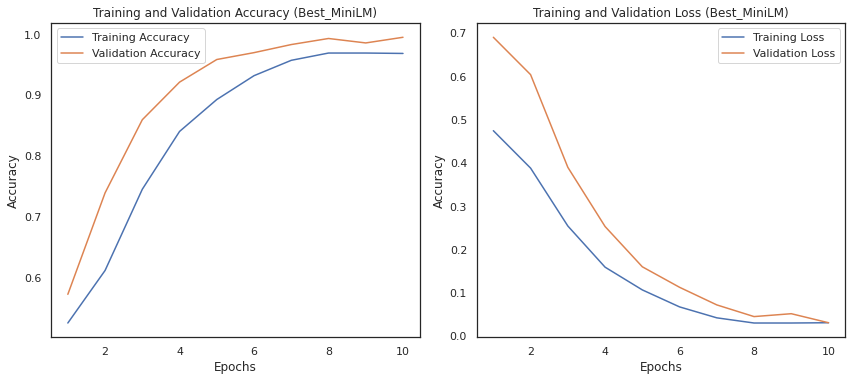

In [29]:
epochs = range(1, len(train_acc_blm) + 1)
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.plot(epochs, train_acc_blm, label='Training Accuracy')
plt.plot(epochs, val_acc_blm, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Best_MiniLM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(epochs, train_loss_blm, label='Training Loss')
plt.plot(epochs, val_loss_blm, label='Validation Loss')
plt.title('Training and Validation Loss (Best_MiniLM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.tight_layout()

# Models Comparison

In [37]:
tables = {'Models': ['SBERT', 'MiniLM', 'Fine tuned_SBERT', 'Best_MiniLM'],
         'Validation accuracy': [val_acc_bert[-1], val_acc_lm[-1], val_acc_bbert[-1], val_acc_blm[-1]],
         'Validation losses': [val_loss_bert[-1], val_loss_lm[-1], val_loss_bbert[-1], val_loss_blm[-1]]}
comparison = pd.DataFrame(tables)
comparison.head()

,Models,Validation accuracy,Validation losses
0,SBERT,0.551170,0.686623
1,MiniLM,0.578457,0.421543
2,Best_SBERT,0.551802,0.685395
3,Best_MiniLM,0.995346,0.031219
